# Financial Analysis: AtliQ Hardware

# Project goal:
Finding the most profitable and the less profitable divisions, segments and categories of the products.

# Plan of action:
## 1. Data preprocessing
- Check for missing values.
- Check for duplicated values.
- Check for incorrect column names.
- Check for data type correspondence.
- Check for misprints.
- Check for wrong lower or higher cases.
- Check for outliers.
- Correct data if possible.
- Delete data if needed.

## 2. Financial Analysis
- Calculate total revenue by years and months. Plot a graph.
- Calculate total profit by years and months. Plot a graph.
- Calculate total margin by years and months. Plot a graph.
- Calculate revenue by divisions by years and months. Plot a graph.
- Calculate profit by divisions by years and months. Plot a graph.
- Calculate margin by divisions by years and months. Plot a graph.
- Calculate revenue by segments by years and months. Plot a graph.
- Calculate profit by segments by years and months. Plot a graph.
- Calculate margin by segments by years and months. Plot a graph.
- Calculate revenue by categories by years and months. Plot a graph.
- Calculate profit by categories by years and months. Plot a graph.
- Calculate margin by categories by years and months. Plot a graph.
- Find the most profitable divisions, segments and categories of the products. 
- Find the less profitable divisions, segments and categories of the products. 
- Find out if there are unprofitable divisions, segments or categories of the products.
- Provide recommendations.

## Hypotheses
- There are unprofitable divisions, segments or categories of the products.
- There are seasons when revenue, profit or margin are lower of higher.
- There are season differences in the revenue and profit.
- There are differences between Graphic Card and Internal HDD revenue and profit.

In [1]:
# importing libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# loading dataframes
con = sqlite3.connect('atliq_db.sqlite3')

In [3]:
# saving raw data
con_raw = con

In [4]:
# checking tables
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',), ('revenue_df',), ('revenue_df_2',), ('revenue_df_4',), ('revenue_df_5',)]


In [5]:
# creating function to get info about dataframe
def get_info(df):
    display(df)
    df.info()

## 1. Data preprocessing

In [6]:
# getting info about dim_customer df
query = "SELECT * FROM dim_customer"
dim_customer = pd.read_sql_query(query, con)
get_info(dim_customer)

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC
...,...,...,...,...,...,...,...
204,90024183,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,LATAM,LATAM
205,90024184,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM
206,90025209,Electricalsbea Stores,Brick & Mortar,Retailer,Columbia,LATAM,LATAM
207,90026205,Amazon,E-Commerce,Retailer,Mexico,LATAM,LATAM


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  209 non-null    int64 
 1   customer       209 non-null    object
 2   platform       209 non-null    object
 3   channel        209 non-null    object
 4   market         209 non-null    object
 5   sub_zone       209 non-null    object
 6   region         209 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.6+ KB


In [7]:
# getting info about dim_product df
query = "SELECT * FROM dim_product"
dim_product = pd.read_sql_query(query, con)
get_info(dim_product)

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard
...,...,...,...,...,...,...
392,A7220160202,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Plus
393,A7220160203,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Premium
394,A7321160301,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Standard
395,A7321160302,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Plus


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


In [8]:
# getting info about fact_pre_discount df
query = "SELECT * FROM fact_pre_discount"
fact_pre_discount = pd.read_sql_query(query, con)
get_info(fact_pre_discount)

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057
...,...,...,...
1040,90027207,2018,0.2803
1041,90027207,2019,0.2248
1042,90027207,2020,0.2386
1043,90027207,2021,0.2772


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_code             1045 non-null   int64  
 1   fiscal_year               1045 non-null   int64  
 2   pre_invoice_discount_pct  1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 24.6 KB


In [9]:
# getting info about fact_manufacturing_cost df
query = "SELECT * FROM fact_manufacturing_cost"
fact_manufacturing_cost = pd.read_sql_query(query, con)
get_info(fact_manufacturing_cost)

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036
...,...,...,...
1177,A7321160301,2022,13.4069
1178,A7321160302,2021,12.5670
1179,A7321160302,2022,13.1954
1180,A7321160303,2021,12.9502


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        1182 non-null   object 
 1   cost_year           1182 non-null   int64  
 2   manufacturing_cost  1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [10]:
# getting info about fact_gross_price df
query = "SELECT * FROM fact_gross_price"
fact_gross_price = pd.read_sql_query(query, con)
get_info(fact_gross_price)

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875
...,...,...,...
1177,A7321160301,2022,44.6260
1178,A7321160302,2021,43.9446
1179,A7321160302,2022,46.0399
1180,A7321160303,2021,42.8483


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  1182 non-null   object 
 1   fiscal_year   1182 non-null   int64  
 2   gross_price   1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [11]:
# getting info about fact_sales_monthly df
query = "SELECT * FROM fact_sales_monthly"
fact_sales_monthly = pd.read_sql_query(query, con)
get_info(fact_sales_monthly)

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017,51,2018
1,2017-09-01,A0118150101,70002018,77,2018
2,2017-09-01,A0118150101,70003181,17,2018
3,2017-09-01,A0118150101,70003182,6,2018
4,2017-09-01,A0118150101,70006157,5,2018
...,...,...,...,...,...
67245,2019-06-01,A0418150104,90013122,10,2019
67246,2019-06-01,A0418150104,90013124,16,2019
67247,2019-06-01,A0418150104,90014136,2,2019
67248,2019-06-01,A0418150104,90014137,1,2019


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67250 entries, 0 to 67249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           67250 non-null  object
 1   product_code   67250 non-null  object
 2   customer_code  67250 non-null  int64 
 3   sold_quantity  67250 non-null  int64 
 4   fiscal_year    67250 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.6+ MB


__Checking for data type correspondence__

In [12]:
print('dim_customer')
query = "PRAGMA table_info(dim_customer)"
output = pd.read_sql_query(query, con)
display(output)
print()
print('dim_product')
query = "PRAGMA table_info(dim_product)"
output = pd.read_sql_query(query, con)
display(output)
print()
print('fact_pre_discount')
query = "PRAGMA table_info(fact_pre_discount)"
output = pd.read_sql_query(query, con)
display(output)
print()
print('fact_manufacturing_cost')
query = "PRAGMA table_info(fact_manufacturing_cost)"
output = pd.read_sql_query(query, con)
display(output)
print()
print('fact_gross_price')
query = "PRAGMA table_info(fact_gross_price)"
output = pd.read_sql_query(query, con)
display(output)
print()
print('fact_sales_monthly')
query = "PRAGMA table_info(fact_sales_monthly)"
output = pd.read_sql_query(query, con)
display(output)

dim_customer


,cid,name,type,notnull,dflt_value,pk
0,0,customer_code,INTEGER,0,None,0
1,1,customer,TEXT,0,None,0
2,2,platform,TEXT,0,None,0
3,3,channel,TEXT,0,None,0
4,4,market,TEXT,0,None,0
5,5,sub_zone,TEXT,0,None,0
6,6,region,TEXT,0,None,0



dim_product


,cid,name,type,notnull,dflt_value,pk
0,0,product_code,TEXT,0,None,0
1,1,division,TEXT,0,None,0
2,2,segment,TEXT,0,None,0
3,3,category,TEXT,0,None,0
4,4,product,TEXT,0,None,0
5,5,variant,TEXT,0,None,0



fact_pre_discount


,cid,name,type,notnull,dflt_value,pk
0,0,customer_code,INTEGER,0,None,0
1,1,fiscal_year,INTEGER,0,None,0
2,2,pre_invoice_discount_pct,float,0,None,0



fact_manufacturing_cost


,cid,name,type,notnull,dflt_value,pk
0,0,product_code,TEXT,0,None,0
1,1,cost_year,INTEGER,0,None,0
2,2,manufacturing_cost,float,0,None,0



fact_gross_price


,cid,name,type,notnull,dflt_value,pk
0,0,product_code,TEXT,0,None,0
1,1,fiscal_year,INTEGER,0,None,0
2,2,gross_price,float,0,None,0



fact_sales_monthly


,cid,name,type,notnull,dflt_value,pk
0,0,date,TEXT,0,None,0
1,1,product_code,TEXT,0,None,0
2,2,customer_code,INTEGER,0,None,0
3,3,sold_quantity,INTEGER,0,None,0
4,4,fiscal_year,INTEGER,0,None,0


In [13]:
# changing fact_sales_monthly columns to correct data types
query = """
    SELECT 
        CAST(date AS text) AS date,
        CAST(product_code AS text) as product_code,
        CAST(customer_code AS int) as customer_code,
        CAST(sold_quantity AS int) as sold_quantity,
        CAST(fiscal_year AS int) AS fiscal_year
    FROM 
        fact_sales_monthly"""
con.execute(query)
fact_sales_monthly = pd.read_sql_query(query, con)

## 1. Data preprocessing

__Checking for missing values__

In [14]:
# checking for missing values
print('dim_customer')
print(dim_customer.isna().sum())
print()
print('dim_product')
print(dim_product.isna().sum())
print()
print('fact_pre_discount')
print(fact_pre_discount.isna().sum())
print()
print('fact_manufacturing_cost')
print(fact_manufacturing_cost.isna().sum())
print()
print('fact_gross_price')
print(fact_gross_price.isna().sum())
print()
print('fact_sales_monthly')
print(fact_sales_monthly.isna().sum())

dim_customer
customer_code    0
customer         0
platform         0
channel          0
market           0
sub_zone         0
region           0
dtype: int64

dim_product
product_code    0
division        0
segment         0
category        0
product         0
variant         0
dtype: int64

fact_pre_discount
customer_code               0
fiscal_year                 0
pre_invoice_discount_pct    0
dtype: int64

fact_manufacturing_cost
product_code          0
cost_year             0
manufacturing_cost    0
dtype: int64

fact_gross_price
product_code    0
fiscal_year     0
gross_price     0
dtype: int64

fact_sales_monthly
date             0
product_code     0
customer_code    0
sold_quantity    0
fiscal_year      0
dtype: int64


In [15]:
query = """
    SELECT 
        * 
    FROM 
        fact_sales_monthly
    WHERE
        customer_code IS NULL;
"""
fact_sales_monthly_null = pd.read_sql_query(query, con)
fact_sales_monthly_null.head(10)

,date,product_code,customer_code,sold_quantity,fiscal_year


_There are missing values in the "fact_sales_monthly" df with the product code A0_

In [16]:
query = """
    SELECT 
        * 
    FROM 
        dim_product
    WHERE
        product_code = 'A0';
    """
product_code_A0 = pd.read_sql_query(query, con)
product_code_A0.head(10)

,product_code,division,segment,category,product,variant


_There is no product with the code A0. We can just delete the row_

In [17]:
# deleting the product with the code A0
query = """
    DELETE FROM 
        fact_sales_monthly
    WHERE
        product_code = 'A0';
    """
con.execute(query)
query_select = "SELECT * FROM fact_sales_monthly;"
fact_sales_monthly = pd.read_sql_query(query_select, con)
get_info(fact_sales_monthly)

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017,51,2018
1,2017-09-01,A0118150101,70002018,77,2018
2,2017-09-01,A0118150101,70003181,17,2018
3,2017-09-01,A0118150101,70003182,6,2018
4,2017-09-01,A0118150101,70006157,5,2018
...,...,...,...,...,...
67245,2019-06-01,A0418150104,90013122,10,2019
67246,2019-06-01,A0418150104,90013124,16,2019
67247,2019-06-01,A0418150104,90014136,2,2019
67248,2019-06-01,A0418150104,90014137,1,2019


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67250 entries, 0 to 67249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           67250 non-null  object
 1   product_code   67250 non-null  object
 2   customer_code  67250 non-null  int64 
 3   sold_quantity  67250 non-null  int64 
 4   fiscal_year    67250 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.6+ MB


__Checking for duplicates__

In [18]:
# checking for duplicated rows
print(dim_customer.duplicated().sum())
print(dim_product.duplicated().sum())
print(fact_pre_discount.duplicated().sum())
print(fact_manufacturing_cost.duplicated().sum())
print(fact_gross_price.duplicated().sum())
print(fact_sales_monthly.duplicated().sum())

0
0
0
0
0
0


_No duplicates_

__Checking for incorrect column names__

In [19]:
print('dim_customer')
dim_customer.info()
print()
print('dim_product')
dim_product.info()
print()
print('fact_pre_discount')
fact_pre_discount.info()
print()
print('fact_manufacturing_cost')
fact_manufacturing_cost.info()
print()
print('fact_gross_price')
fact_gross_price.info()
print()
print('fact_sales_monthly')
fact_sales_monthly.info()

dim_customer
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  209 non-null    int64 
 1   customer       209 non-null    object
 2   platform       209 non-null    object
 3   channel        209 non-null    object
 4   market         209 non-null    object
 5   sub_zone       209 non-null    object
 6   region         209 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.6+ KB

dim_product
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null   

_No incorrect column names_

__Checking for misprints and wrong lower or higher cases__

In [20]:
# checking for duplicated customers' codes in dim_customer df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        dim_customer
    GROUP BY 
        customer_code
    HAVING 
        COUNT(*) != 1;
    """
output = pd.read_sql_query(query, con)
display(output)

,customer_code,customer,platform,channel,market,sub_zone,region,COUNT(*)


_No duplicated customers' codes in dim customer df_

In [21]:
# checking for misprints and wrong lower or higher cases in customer column in dim_customer df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        dim_customer
    GROUP BY 
        customer
    """
output = pd.read_sql_query(query, con)
pd.options.display.max_rows = 100
display(output)
pd.reset_option('all')

,customer_code,customer,platform,channel,market,sub_zone,region,COUNT(*)
0,90003179,Acclaimed Stores,Brick & Mortar,Retailer,Indonesia,ROA,APAC,2
1,90004064,All-Out,Brick & Mortar,Retailer,Japan,ROA,APAC,1
2,90002008,Amazon,E-Commerce,Retailer,India,India,APAC,4
3,90002016,Amazon,E-Commerce,Retailer,India,India,APAC,25
4,90013119,Argos (Sainsbury's),Brick & Mortar,Retailer,Italy,SE,EU,3
5,90020097,Atlas Stores,Brick & Mortar,Retailer,Austria,NE,EU,2
6,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,17
7,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC,24
8,90022075,BestBuy,Brick & Mortar,Retailer,USA,NA,NA,1
9,90012036,Billa,Brick & Mortar,Retailer,Germany,NE,EU,1


As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



_There are two customers named Amazon with the customers' codes 90002008 and 90002016. One customer can have several customers' codes, since code is assigned to a customer based on the customer name, platform, channel and region. But customer name, platform, channel and region in Amazon are the same._

In [22]:
# checking for misprints and wrong lower or higher cases in platform column in dim_customer df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        dim_customer
    GROUP BY 
        platform
    """
output = pd.read_sql_query(query, con)
display(output)

,customer_code,customer,platform,channel,market,sub_zone,region,COUNT(*)
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,150
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC,59


In [23]:
# checking for misprints and wrong lower or higher cases in channel column in dim_customer df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        dim_customer
    GROUP BY 
        channel
    """
output = pd.read_sql_query(query, con)
display(output)

,customer_code,customer,platform,channel,market,sub_zone,region,COUNT(*)
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,40
1,80001019,Neptune,Brick & Mortar,Distributor,China,ROA,APAC,5
2,90001020,Zone,Brick & Mortar,Retailer,China,ROA,APAC,164


In [24]:
# checking for misprints and wrong lower or higher cases in market column in dim_customer df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        dim_customer
    GROUP BY 
        market
    """
output = pd.read_sql_query(query, con)
display(output)

,customer_code,customer,platform,channel,market,sub_zone,region,COUNT(*)
0,70008169,Atliq Exclusive,Brick & Mortar,Direct,Australia,ANZ,APAC,7
1,70020104,Atliq e Store,E-Commerce,Direct,Austria,NE,EU,8
2,70010047,Atliq Exclusive,Brick & Mortar,Direct,Bangladesh,ROA,APAC,5
3,70027208,Atliq e Store,E-Commerce,Direct,Brazil,LATAM,LATAM,2
4,70023031,Atliq Exclusive,Brick & Mortar,Direct,Canada,NA,NA,11
5,90024183,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,LATAM,LATAM,2
6,80001019,Neptune,Brick & Mortar,Distributor,China,ROA,APAC,3
7,90025209,Electricalsbea Stores,Brick & Mortar,Retailer,Columbia,LATAM,LATAM,1
8,70011193,Atliq Exclusive,Brick & Mortar,Direct,France,SE,EU,10
9,70012042,Atliq Exclusive,Brick & Mortar,Direct,Germany,NE,EU,11


In [25]:
# checking for misprints and wrong lower or higher cases in sub_zone column in dim_customer df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        dim_customer
    GROUP BY 
        sub_zone
    """
output = pd.read_sql_query(query, con)
display(output)

,customer_code,customer,platform,channel,market,sub_zone,region,COUNT(*)
0,70008169,Atliq Exclusive,Brick & Mortar,Direct,Australia,ANZ,APAC,15
1,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,18
2,70026206,Atliq e Store,E-Commerce,Direct,Mexico,LATAM,LATAM,7
3,70022084,Atliq Exclusive,Brick & Mortar,Direct,USA,NA,NA,26
4,70012042,Atliq Exclusive,Brick & Mortar,Direct,Germany,NE,EU,61
5,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC,38
6,70011193,Atliq Exclusive,Brick & Mortar,Direct,France,SE,EU,44


In [26]:
# checking for misprints and wrong lower or higher cases in region column in dim_customer df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        dim_customer
    GROUP BY 
        region
    """
output = pd.read_sql_query(query, con)
display(output)

,customer_code,customer,platform,channel,market,sub_zone,region,COUNT(*)
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,71
1,70011193,Atliq Exclusive,Brick & Mortar,Direct,France,SE,EU,105
2,70026206,Atliq e Store,E-Commerce,Direct,Mexico,LATAM,LATAM,7
3,70022084,Atliq Exclusive,Brick & Mortar,Direct,USA,NA,NA,26


_No misprints and wrong lower or higher cases in dim customer df. Customers have one platform, sub zone and region. There are two customers named Amazon with the customers' codes 90002008 and 90002016. One customer can have several customers' codes, since code is assigned to a customer based on the customer name, platform, channel and region. But customer name, platform, channel and region in Amazon are the same._

In [27]:
# checking for misprints and wrong lower or higher cases in product_code column in dim_product df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        dim_product
    GROUP BY 
        product_code
    HAVING 
        COUNT(*) != 1;
    """
output = pd.read_sql_query(query, con)
display(output)

,product_code,division,segment,category,product,variant,COUNT(*)


_No duplicated products' codes_

In [28]:
# checking for misprints and wrong lower or higher cases in division column in dim_product df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        dim_product
    GROUP BY 
        division
    """
output = pd.read_sql_query(query, con)
display(output)

,product_code,division,segment,category,product,variant,COUNT(*)
0,A6218160101,N & S,Storage,External Solid State Drives,AQ Digit SSD,Standard,36
1,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,200
2,A4118110101,PC,Notebook,Personal Laptop,AQ Aspiron,Standard Grey,161


In [29]:
# checking for misprints and wrong lower or higher cases in segment column in dim_product df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        dim_product
    GROUP BY 
        segment
    """
output = pd.read_sql_query(query, con)
display(output)

,product_code,division,segment,category,product,variant,COUNT(*)
0,A2118150101,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Standard 1,116
1,A5820110101,PC,Desktop,Business Laptop,AQ BZ Allin1,Standard 1,32
2,A7118160101,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Standard,9
3,A4118110101,PC,Notebook,Personal Laptop,AQ Aspiron,Standard Grey,129
4,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,84
5,A6218160101,N & S,Storage,External Solid State Drives,AQ Digit SSD,Standard,27


In [30]:
# checking for misprints and wrong lower or higher cases in category column in dim_product df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        dim_product
    GROUP BY 
        category
    """
output = pd.read_sql_query(query, con)
display(output)

,product_code,division,segment,category,product,variant,COUNT(*)
0,A3718150101,P & A,Accessories,Batteries,AQ LION x1,Standard,20
1,A4918110101,PC,Notebook,Business Laptop,AQ BZ 101,Standard Grey,44
2,A6218160101,N & S,Storage,External Solid State Drives,AQ Digit SSD,Standard,15
3,A5318110101,PC,Notebook,Gaming Laptop,AQ Gamer 1,Standard Firey Red,40
4,A0418150101,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 1,36
5,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,10
6,A2918150101,P & A,Accessories,Keyboard,AQ Master wired x1,Standard 1,48
7,A1618150101,P & A,Peripherals,MotherBoard,AQ MB Elite,Standard,20
8,A2118150101,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Standard 1,48
9,A6018110101,PC,Desktop,Personal Desktop,AQ Home Allin1,Standard 1,16


In [31]:
# checking for misprints and wrong lower or higher cases in product column in dim_product df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        dim_product
    GROUP BY 
        product
    """
output = pd.read_sql_query(query, con)
pd.options.display.max_rows = 100
display(output)
pd.reset_option('all')

,product_code,division,segment,category,product,variant,COUNT(*)
0,A1118150201,P & A,Peripherals,Processors,AQ 5000 Series Electron 8 5900X Desktop Processor,Standard,3
1,A1018150101,P & A,Peripherals,Processors,AQ 5000 Series Electron 9 5900X Desktop Processor,Standard,3
2,A1219150301,P & A,Peripherals,Processors,AQ 5000 Series Ultron 8 5900X Desktop Processor,Standard,3
3,A4118110101,PC,Notebook,Personal Laptop,AQ Aspiron,Standard Grey,7
4,A4918110101,PC,Notebook,Business Laptop,AQ BZ 101,Standard Grey,4
5,A5820110101,PC,Desktop,Business Laptop,AQ BZ Allin1,Standard 1,8
6,A5921110201,PC,Desktop,Business Laptop,AQ BZ Allin1 Gen 2,Standard 1,8
7,A5018110201,PC,Notebook,Business Laptop,AQ BZ Compact,Standard Grey,8
8,A5119110301,PC,Notebook,Business Laptop,AQ BZ Gen Y,Standard Grey,8
9,A5219110401,PC,Notebook,Business Laptop,AQ BZ Gen Z,Standard Grey,8


As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [32]:
# checking for misprints and wrong lower or higher cases in variant column in dim_product df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        dim_product
    GROUP BY 
        variant
    """
output = pd.read_sql_query(query, con)
display(output)

,product_code,division,segment,category,product,variant,COUNT(*)
0,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus,21
1,A0418150104,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,31
2,A3718150102,P & A,Accessories,Batteries,AQ LION x1,Plus 1,4
3,A0418150105,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 2,35
4,A0418150106,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 3,11
5,A5318110106,PC,Notebook,Gaming Laptop,AQ Gamer 1,Plus Black,5
6,A4118110105,PC,Notebook,Personal Laptop,AQ Aspiron,Plus Blue,11
7,A5318110105,PC,Notebook,Gaming Laptop,AQ Gamer 1,Plus Cool Blue,5
8,A5318110104,PC,Notebook,Gaming Laptop,AQ Gamer 1,Plus Firey Red,5
9,A4118110104,PC,Notebook,Personal Laptop,AQ Aspiron,Plus Grey,11


_No misprints and wrong lower or higher cases in dim product df._

In [33]:
# checking for duplicated customers' codes in one fiscal year in fact_pre_discount df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        fact_pre_discount
    GROUP BY 
        customer_code,
        fiscal_year
    HAVING 
        COUNT(*) != 1;
    """
output = pd.read_sql_query(query, con)
display(output)

,customer_code,fiscal_year,pre_invoice_discount_pct,COUNT(*)


_There are no duplicated customers' codes in one fiscal year_

In [34]:
# checking for unnecessary fiscal years in fact_pre_discount df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        fact_pre_discount
    GROUP BY 
        fiscal_year
    """
output = pd.read_sql_query(query, con)
display(output)

,customer_code,fiscal_year,pre_invoice_discount_pct,COUNT(*)
0,70002017,2018,0.0824,209
1,70002017,2019,0.0777,209
2,70002017,2020,0.0735,209
3,70002017,2021,0.0703,209
4,70002017,2022,0.1057,209


_There are no unnecessary fiscal years_

In [35]:
# checking for duplicated products' codes in one year in fact_manufacturing_cost df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        fact_manufacturing_cost
    GROUP BY 
        product_code,
        cost_year
    HAVING 
        COUNT(*) != 1;
    """
output = pd.read_sql_query(query, con)
display(output)

,product_code,cost_year,manufacturing_cost,COUNT(*)


_There are no duplicated products' codes in one year_

In [36]:
# checking for unnecessary years in fact_manufacturing_cost df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        fact_manufacturing_cost
    GROUP BY 
        cost_year
    """
output = pd.read_sql_query(query, con)
display(output)

,product_code,cost_year,manufacturing_cost,COUNT(*)
0,A0118150101,2018,4.6190,87
1,A0118150101,2019,4.2033,171
2,A0118150101,2020,5.0207,245
3,A0118150101,2021,5.5172,334
4,A0118150103,2022,7.1831,345


_There are no unnecessary years_

In [37]:
# checking for duplicated products' codes in one fiscal year in fact_gross_price df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        fact_gross_price
    GROUP BY 
        product_code,
        fiscal_year
    HAVING 
        COUNT(*) != 1;
    """
output = pd.read_sql_query(query, con)
display(output)

,product_code,fiscal_year,gross_price,COUNT(*)


_There are no duplicated products' codes in one fiscal year_

In [38]:
# checking for unnecessary fiscal years in fact_gross_price df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        fact_gross_price
    GROUP BY 
        fiscal_year
    """
output = pd.read_sql_query(query, con)
display(output)

,product_code,fiscal_year,gross_price,COUNT(*)
0,A0118150101,2018,15.3952,87
1,A0118150101,2019,14.4392,171
2,A0118150101,2020,16.2323,245
3,A0118150101,2021,19.0573,334
4,A0118150103,2022,23.9920,345


_There are no unnecessary fiscal years_

In [39]:
# checking for unnecessary dates in fact_sales_monthly df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        fact_sales_monthly
    GROUP BY 
        date
    """
output = pd.read_sql_query(query, con)
display(output)

,date,product_code,customer_code,sold_quantity,fiscal_year,COUNT(*)
0,2017-09-01,A0118150101,70002017,51,2018,656
1,2017-10-01,A0118150101,70002017,54,2018,600
2,2017-11-01,A0118150101,70002017,30,2018,596
3,2017-12-01,A0118150101,70002018,129,2018,591
4,2018-01-01,A0118150101,70002017,14,2018,590
5,2018-02-01,A0118150101,70002017,62,2018,589
6,2018-03-01,A0118150101,70002017,60,2018,588
7,2018-04-01,A0118150101,70002018,67,2018,580
8,2018-05-01,A0118150101,70002017,53,2018,588
9,2018-06-01,A0118150101,70002017,56,2018,588


_There are no unnecessary dates_

In [40]:
# checking for unnecessary fiscal years in fact_sales_monthly df
query = """
    SELECT 
        *,
        COUNT(*)
    FROM 
        fact_sales_monthly
    GROUP BY 
        fiscal_year
    """
output = pd.read_sql_query(query, con)
display(output)

,date,product_code,customer_code,sold_quantity,fiscal_year,COUNT(*)
0,2017-09-01,A0118150101,70002017,51,2018,7133
1,2018-09-01,A0118150101,70002017,34,2019,13918
2,2019-09-01,A0118150101,70002017,137,2020,19866
3,2020-09-01,A0118150101,70002017,248,2021,20690
4,2021-09-01,A0118150103,70002017,537,2022,5643


_There are no unnecessary fiscal years_

## 2. Financial Analysis

In [41]:
# setting the display format for floating-point numbers in a pandas DataFrame to always show two decimal places
pd.options.display.float_format = '{:.2f}'.format

In [42]:
# creating df revenue_df_10, which merged with the data from the other dfs
query = """
    CREATE TABLE revenue_df_10 AS
    SELECT 
        fact_sales_monthly.date,
        fact_sales_monthly.fiscal_year AS year,
        fact_sales_monthly.product_code, 
        fact_gross_price.gross_price,
        fact_manufacturing_cost.manufacturing_cost,
        fact_sales_monthly.sold_quantity,
        dim_product.division,
        dim_product.segment,
        dim_product.category,
        dim_customer.customer_code,
        dim_customer.market,
        dim_customer.sub_zone,
        dim_customer.region,
        fact_pre_discount.pre_invoice_discount_pct        
    FROM 
        fact_sales_monthly
    INNER JOIN 
        fact_gross_price,
        fact_manufacturing_cost,
        dim_product,
        dim_customer,
        fact_pre_discount
    ON fact_sales_monthly.product_code = fact_gross_price.product_code 
        AND fact_sales_monthly.fiscal_year = fact_gross_price.fiscal_year
        AND fact_sales_monthly.product_code = fact_manufacturing_cost.product_code
        AND fact_sales_monthly.fiscal_year = fact_manufacturing_cost.cost_year
        AND fact_sales_monthly.product_code = dim_product.product_code
        AND fact_sales_monthly.product_code = dim_product.product_code
        AND fact_sales_monthly.customer_code = dim_customer.customer_code
        AND fact_sales_monthly.customer_code = fact_pre_discount.customer_code
        AND fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year;
    """
con.execute(query)
query_select = "SELECT * FROM revenue_df_10;"
revenue_df_10 = pd.read_sql_query(query_select, con)
display(revenue_df_10)

,date,year,product_code,gross_price,manufacturing_cost,sold_quantity,division,segment,category,customer_code,market,sub_zone,region,pre_invoice_discount_pct
0,2017-09-01,2018,A0118150101,15.40,4.62,51,P & A,Peripherals,Internal HDD,70002017,India,India,APAC,0.08
1,2017-09-01,2018,A0118150101,15.40,4.62,77,P & A,Peripherals,Internal HDD,70002018,India,India,APAC,0.30
2,2017-09-01,2018,A0118150101,15.40,4.62,17,P & A,Peripherals,Internal HDD,70003181,Indonesia,ROA,APAC,0.05
3,2017-09-01,2018,A0118150101,15.40,4.62,6,P & A,Peripherals,Internal HDD,70003182,Indonesia,ROA,APAC,0.24
4,2017-09-01,2018,A0118150101,15.40,4.62,5,P & A,Peripherals,Internal HDD,70006157,Philiphines,ROA,APAC,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,2019-06-01,2019,A0418150104,17.50,5.31,10,P & A,Peripherals,Graphic Card,90013122,Italy,SE,EU,0.21
67246,2019-06-01,2019,A0418150104,17.50,5.31,16,P & A,Peripherals,Graphic Card,90013124,Italy,SE,EU,0.19
67247,2019-06-01,2019,A0418150104,17.50,5.31,2,P & A,Peripherals,Graphic Card,90014136,Netherlands,NE,EU,0.26
67248,2019-06-01,2019,A0418150104,17.50,5.31,1,P & A,Peripherals,Graphic Card,90014137,Netherlands,NE,EU,0.27


In [43]:
# creating columns revenue, profit, profit_with_discounts, profit_total, 
# profit_total_with_discounts margin and margin_with_discounts in revenue_df_10 df
query = """
    ALTER TABLE revenue_df_10
    ADD COLUMN revenue FLOAT;
    """
cursor.execute(query)
query = """
    ALTER TABLE revenue_df_10
    ADD COLUMN profit FLOAT;
    """
cursor.execute(query)
query = """
    ALTER TABLE revenue_df_10
    ADD COLUMN profit_with_discounts FLOAT;
    """
cursor.execute(query)
query = """
    ALTER TABLE revenue_df_10
    ADD COLUMN profit_total FLOAT;
    """
cursor.execute(query)
query = """
    ALTER TABLE revenue_df_10
    ADD COLUMN profit_total_with_discounts FLOAT;
    """
cursor.execute(query)
query = """
    ALTER TABLE revenue_df_10
    ADD COLUMN margin FLOAT;
    """
cursor.execute(query)
query = """
    ALTER TABLE revenue_df_10
    ADD COLUMN margin_with_discounts FLOAT;
    """
cursor.execute(query);

In [44]:
# calculating columns revenue, profit, profit_with_discounts, profit_total, 
# profit_total_with_discounts margin and margin_with_discounts in revenue_df_10 df
query = """
    UPDATE revenue_df_10
    SET revenue = gross_price * sold_quantity;
    """
cursor.execute(query)
query = """
    UPDATE revenue_df_10
    SET profit = gross_price - manufacturing_cost;
    """
cursor.execute(query)
query = """
    UPDATE revenue_df_10
    SET profit_with_discounts = gross_price * (1 - pre_invoice_discount_pct) - manufacturing_cost;
    """
cursor.execute(query)
query = """
    UPDATE revenue_df_10
    SET profit_total = profit * sold_quantity;
    """
cursor.execute(query)
query = """
    UPDATE revenue_df_10
    SET profit_total_with_discounts = profit_with_discounts * sold_quantity;
    """
cursor.execute(query)
query = """
    UPDATE revenue_df_10
    SET margin = profit_total / revenue;
    """
cursor.execute(query)
query = """
    UPDATE revenue_df_10
    SET margin_with_discounts = profit_total_with_discounts / revenue;
    """
cursor.execute(query);

In [45]:
query_select = "SELECT * FROM revenue_df_10;"
revenue_df_10 = pd.read_sql_query(query_select, con)
display(revenue_df_10)

,date,year,product_code,gross_price,manufacturing_cost,sold_quantity,division,segment,category,customer_code,...,sub_zone,region,pre_invoice_discount_pct,revenue,profit,profit_with_discounts,profit_total,profit_total_with_discounts,margin,margin_with_discounts
0,2017-09-01,2018,A0118150101,15.40,4.62,51,P & A,Peripherals,Internal HDD,70002017,...,India,APAC,0.08,785.16,10.78,9.51,549.59,484.89,0.70,0.62
1,2017-09-01,2018,A0118150101,15.40,4.62,77,P & A,Peripherals,Internal HDD,70002018,...,India,APAC,0.30,1185.43,10.78,6.23,829.77,479.35,0.70,0.40
2,2017-09-01,2018,A0118150101,15.40,4.62,17,P & A,Peripherals,Internal HDD,70003181,...,ROA,APAC,0.05,261.72,10.78,9.95,183.20,169.17,0.70,0.65
3,2017-09-01,2018,A0118150101,15.40,4.62,6,P & A,Peripherals,Internal HDD,70003182,...,ROA,APAC,0.24,92.37,10.78,7.12,64.66,42.69,0.70,0.46
4,2017-09-01,2018,A0118150101,15.40,4.62,5,P & A,Peripherals,Internal HDD,70006157,...,ROA,APAC,0.11,76.98,10.78,9.15,53.88,45.74,0.70,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,2019-06-01,2019,A0418150104,17.50,5.31,10,P & A,Peripherals,Graphic Card,90013122,...,SE,EU,0.21,175.03,12.19,8.59,121.90,85.89,0.70,0.49
67246,2019-06-01,2019,A0418150104,17.50,5.31,16,P & A,Peripherals,Graphic Card,90013124,...,SE,EU,0.19,280.04,12.19,8.90,195.04,142.47,0.70,0.51
67247,2019-06-01,2019,A0418150104,17.50,5.31,2,P & A,Peripherals,Graphic Card,90014136,...,NE,EU,0.26,35.01,12.19,7.60,24.38,15.19,0.70,0.43
67248,2019-06-01,2019,A0418150104,17.50,5.31,1,P & A,Peripherals,Graphic Card,90014137,...,NE,EU,0.27,17.50,12.19,7.54,12.19,7.54,0.70,0.43


In [46]:
# finding gross revenue, gross profit and gross margin by months (without and with discounts)
query = """
    SELECT 
        date,
        SUM(revenue),
        SUM(profit_total),
        SUM(profit_total_with_discounts),
        AVG(margin),
        AVG(margin_with_discounts)
    FROM 
        revenue_df_10
    GROUP BY
        date
    """
revenue_gross_profit = pd.read_sql_query(query, con)
display(revenue_gross_profit)

,date,SUM(revenue),SUM(profit_total),SUM(profit_total_with_discounts),AVG(margin),AVG(margin_with_discounts)
0,2017-09-01,203560.78,143073.10,93062.02,0.70,0.47
1,2017-10-01,264533.79,186043.71,125544.38,0.70,0.48
2,2017-11-01,375191.41,263918.65,175719.52,0.70,0.47
3,2017-12-01,385598.66,271002.75,176160.41,0.70,0.46
4,2018-01-01,208699.98,146789.60,96281.86,0.70,0.47
5,2018-02-01,207606.75,146059.88,99210.10,0.70,0.48
6,2018-03-01,224224.74,157629.05,104788.55,0.70,0.47
7,2018-04-01,219503.87,154348.32,100899.62,0.70,0.46
8,2018-05-01,210569.32,148047.87,97094.22,0.70,0.47
9,2018-06-01,213202.69,149975.05,101396.18,0.70,0.48


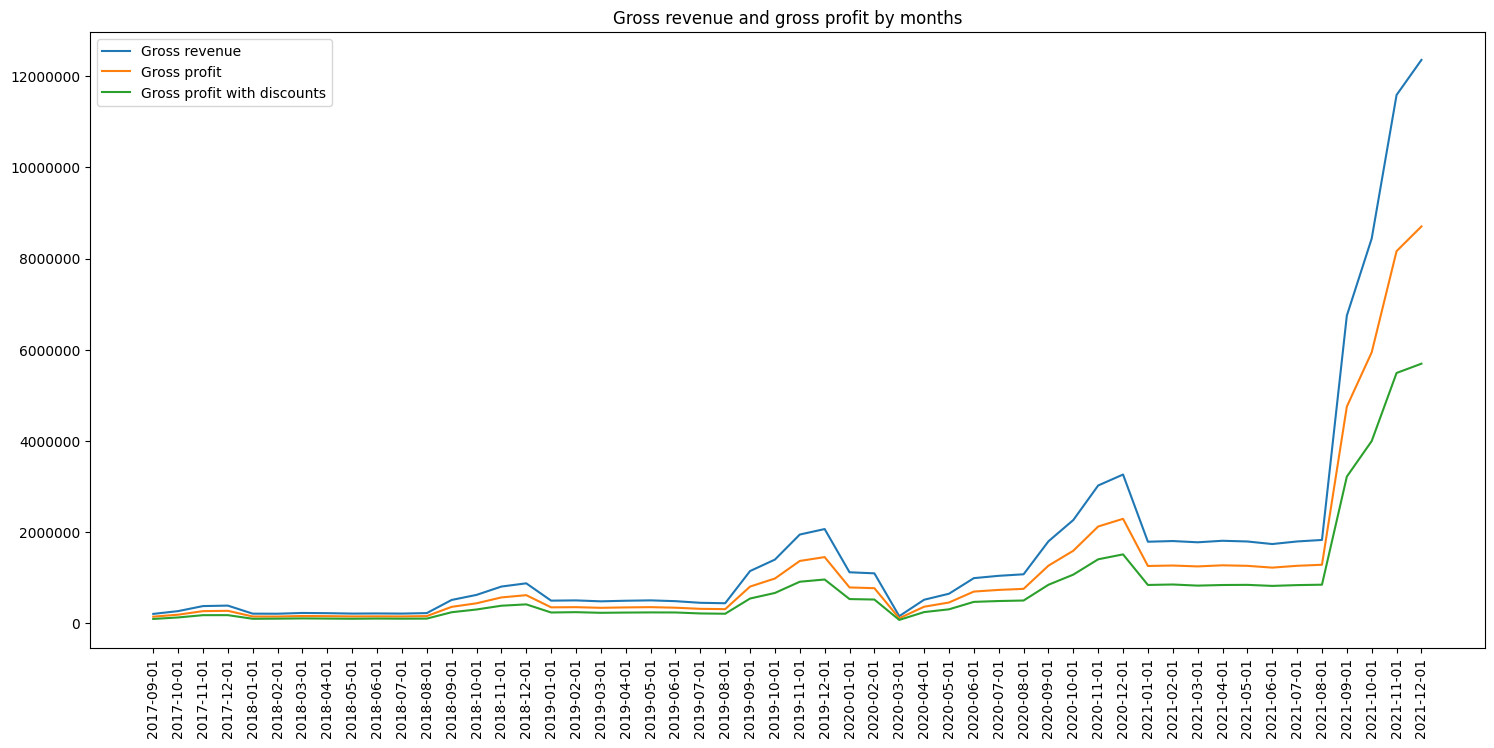

In [47]:
# creating plot gross revenue and gross profit by months
plt.figure(figsize = (18, 8))
plt.plot(revenue_gross_profit['date'], revenue_gross_profit['SUM(revenue)'], label = 'Gross revenue')
plt.plot(revenue_gross_profit['date'], revenue_gross_profit['SUM(profit_total)'], label = 'Gross profit')
plt.plot(revenue_gross_profit['date'], revenue_gross_profit['SUM(profit_total_with_discounts)'], label = 'Gross profit with discounts')
plt.title('Gross revenue and gross profit by months')
plt.xticks(rotation = 90)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset = False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.legend();

_Gross revenue and gross profit at the end of the years is higher._ <br>
_Gross revenue and gross profit after 2021-08-01 are increasing fast._

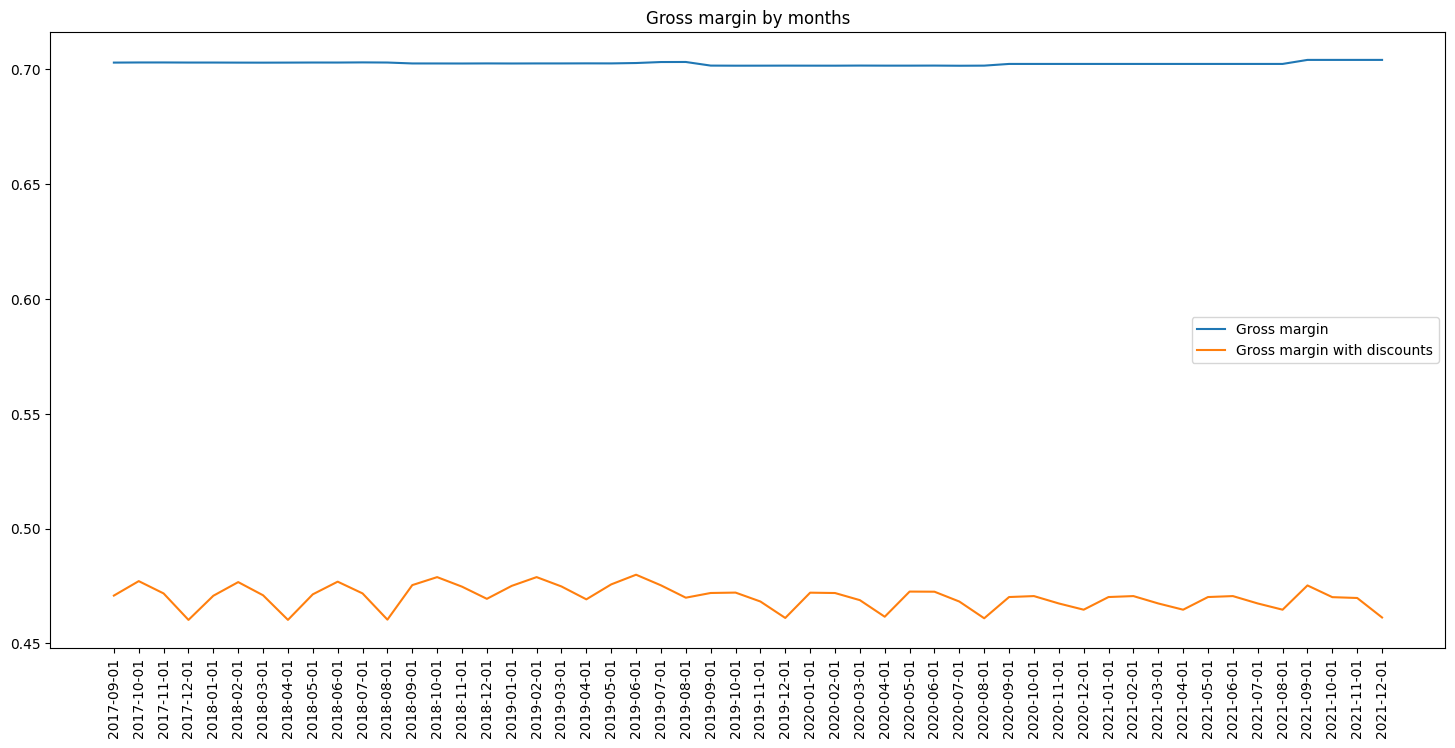

In [48]:
# creating plot gross margin by months
plt.figure(figsize = (18, 8))
plt.plot(revenue_gross_profit['date'], revenue_gross_profit['AVG(margin)'], label = 'Gross margin')
plt.plot(revenue_gross_profit['date'], revenue_gross_profit['AVG(margin_with_discounts)'], label = 'Gross margin with discounts')
plt.title('Gross margin by months')
plt.xticks(rotation = 90)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset = False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.legend();

_Gross margin without discounts is between 0.7014 and 0.7040. The number changes slightly for this research._ <br>
_Gross margin with discounts is between 0.46 and 0.48. Gross margin with discounts is higher in february, june and october. It is lower in april, august and december._

In [49]:
# finding gross revenue, gross profit and gross margin by months in the 'P & A' division (without and with discounts)
query = """
    SELECT 
        date,
        SUM(revenue),
        SUM(profit_total),
        SUM(profit_total_with_discounts),
        AVG(margin),
        AVG(margin_with_discounts),
        division,
        segment,
        category,
        COUNT(*)
    FROM 
        revenue_df_10
    WHERE
        division = 'P & A'
    GROUP BY
        date                
    """
revenue_p_a = pd.read_sql_query(query, con)
display(revenue_p_a)

,date,SUM(revenue),SUM(profit_total),SUM(profit_total_with_discounts),AVG(margin),AVG(margin_with_discounts),division,segment,category,COUNT(*)
0,2017-09-01,203560.78,143073.10,93062.02,0.70,0.47,P & A,Peripherals,Internal HDD,656
1,2017-10-01,264533.79,186043.71,125544.38,0.70,0.48,P & A,Peripherals,Internal HDD,600
2,2017-11-01,375191.41,263918.65,175719.52,0.70,0.47,P & A,Peripherals,Internal HDD,596
3,2017-12-01,385598.66,271002.75,176160.41,0.70,0.46,P & A,Peripherals,Internal HDD,591
4,2018-01-01,208699.98,146789.60,96281.86,0.70,0.47,P & A,Peripherals,Internal HDD,590
5,2018-02-01,207606.75,146059.88,99210.10,0.70,0.48,P & A,Peripherals,Internal HDD,589
6,2018-03-01,224224.74,157629.05,104788.55,0.70,0.47,P & A,Peripherals,Internal HDD,588
7,2018-04-01,219503.87,154348.32,100899.62,0.70,0.46,P & A,Peripherals,Internal HDD,580
8,2018-05-01,210569.32,148047.87,97094.22,0.70,0.47,P & A,Peripherals,Internal HDD,588
9,2018-06-01,213202.69,149975.05,101396.18,0.70,0.48,P & A,Peripherals,Internal HDD,588


In [50]:
query = """
    SELECT 
        DISTINCT division
    FROM 
        revenue_df_10
    """
output = pd.read_sql_query(query, con)
display(output)

,division
0,P & A


_No products sold from divisions N & S and PC. The only products sold are from division P & A._

In [51]:
query = """
    SELECT 
        DISTINCT segment
    FROM 
        revenue_df_10
    """
output = pd.read_sql_query(query, con)
display(output)

,segment
0,Peripherals


_No products sold from segments Accessories, Notebook, Desktop, Storage, Networking. The only products sold are from segment Peripherals._

In [52]:
query = """
    SELECT 
        DISTINCT category
    FROM 
        revenue_df_10
    """
output = pd.read_sql_query(query, con)
display(output)

,category
0,Internal HDD
1,Graphic Card


_The only products sold are from categories Internal HDD and Graphic Card._

In [53]:
# finding gross revenue, gross profit and gross margin by months in the 'Graphic Card' category (without and with discounts)
query = """
    SELECT 
        date,
        SUM(revenue),
        SUM(profit_total),
        SUM(profit_total_with_discounts),
        AVG(margin),
        AVG(margin_with_discounts),
        category,
        COUNT(*)
    FROM 
        revenue_df_10
    WHERE
        category = 'Graphic Card'
    GROUP BY
        date
    """
revenue_graphic_card = pd.read_sql_query(query, con)
revenue_graphic_card.head(10)

,date,SUM(revenue),SUM(profit_total),SUM(profit_total_with_discounts),AVG(margin),AVG(margin_with_discounts),category,COUNT(*)
0,2017-09-01,106794.26,75241.59,48673.31,0.70,0.47,Graphic Card,329
1,2017-10-01,144951.24,102149.76,68768.08,0.70,0.48,Graphic Card,299
2,2017-11-01,197125.79,139004.67,93071.82,0.70,0.47,Graphic Card,298
3,2017-12-01,208606.54,147030.14,95917.49,0.70,0.46,Graphic Card,295
4,2018-01-01,111729.21,78694.18,51770.77,0.70,0.47,Graphic Card,298
5,2018-02-01,114517.50,80724.99,54798.54,0.70,0.48,Graphic Card,295
6,2018-03-01,116640.24,82187.42,54620.48,0.70,0.47,Graphic Card,294
7,2018-04-01,116056.16,81829.19,53384.90,0.70,0.46,Graphic Card,291
8,2018-05-01,116211.46,81872.20,53826.67,0.70,0.47,Graphic Card,295
9,2018-06-01,116471.58,82044.78,55384.84,0.70,0.48,Graphic Card,296


In [54]:
# finding gross revenue, gross profit and gross margin by months in the 'Internal HDD' category (without and with discounts)
query = """
    SELECT 
        date,
        SUM(revenue),
        SUM(profit_total),
        SUM(profit_total_with_discounts),
        AVG(margin),
        AVG(margin_with_discounts),
        category,
        COUNT(*)
    FROM 
        revenue_df_10
    WHERE
        category = 'Internal HDD'
    GROUP BY
        date
    """
revenue_internal_hdd = pd.read_sql_query(query, con)
revenue_internal_hdd.head(10)

,date,SUM(revenue),SUM(profit_total),SUM(profit_total_with_discounts),AVG(margin),AVG(margin_with_discounts),category,COUNT(*)
0,2017-09-01,96766.52,67831.51,44388.71,0.70,0.47,Internal HDD,327
1,2017-10-01,119582.56,83893.95,56776.30,0.70,0.48,Internal HDD,301
2,2017-11-01,178065.61,124913.98,82647.70,0.70,0.47,Internal HDD,298
3,2017-12-01,176992.12,123972.61,80242.92,0.70,0.46,Internal HDD,296
4,2018-01-01,96970.77,68095.42,44511.09,0.70,0.47,Internal HDD,292
5,2018-02-01,93089.25,65334.89,44411.56,0.70,0.48,Internal HDD,294
6,2018-03-01,107584.50,75441.63,50168.07,0.70,0.47,Internal HDD,294
7,2018-04-01,103447.72,72519.13,47514.73,0.70,0.46,Internal HDD,289
8,2018-05-01,94357.86,66175.67,43267.55,0.70,0.47,Internal HDD,293
9,2018-06-01,96731.11,67930.27,46011.34,0.70,0.48,Internal HDD,292


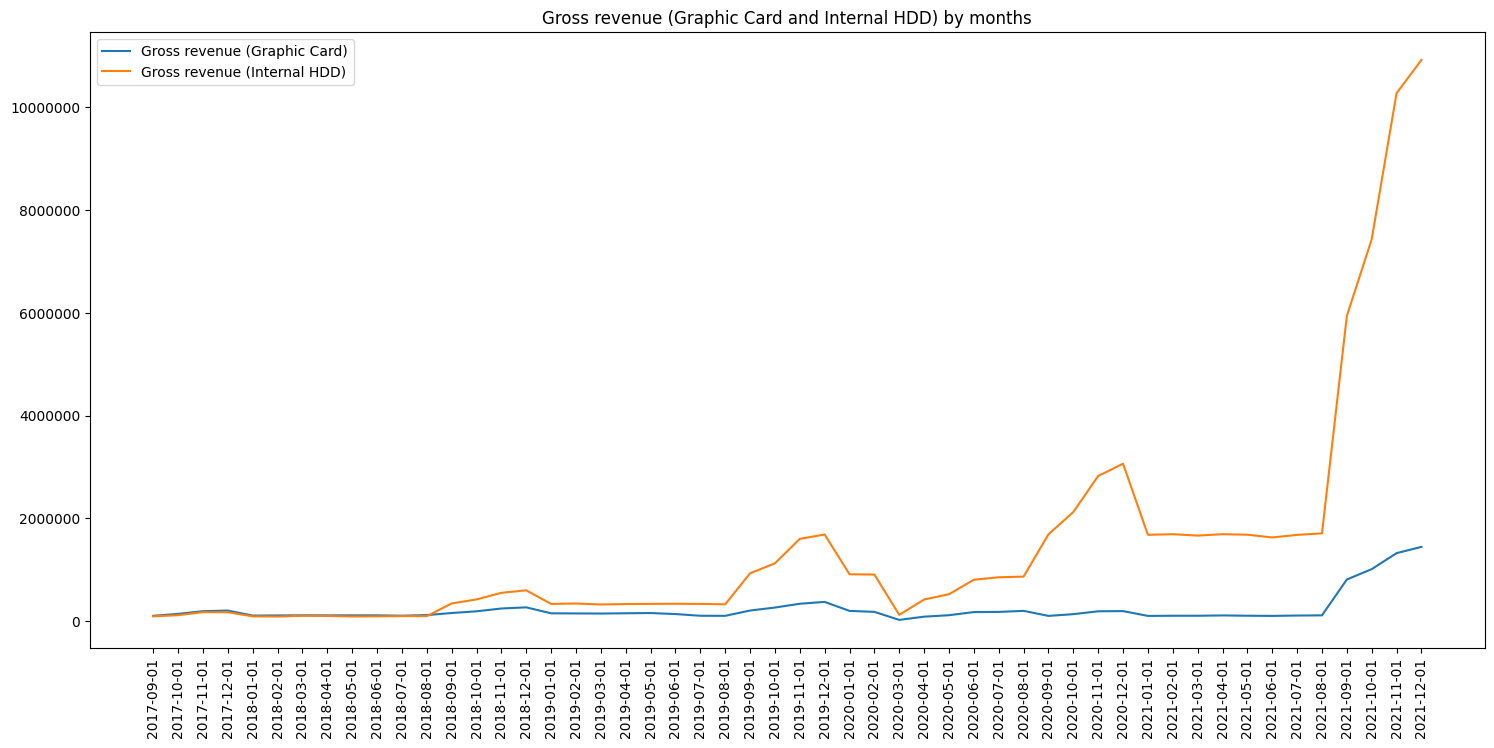

In [55]:
# creating plot 'Gross revenue (Graphic Card and Internal HDD) by months'
plt.figure(figsize = (18, 8))
plt.plot(revenue_graphic_card['date'], revenue_graphic_card['SUM(revenue)'], label = 'Gross revenue (Graphic Card)')
plt.plot(revenue_internal_hdd['date'], revenue_internal_hdd['SUM(revenue)'], label = 'Gross revenue (Internal HDD)')
plt.title('Gross revenue (Graphic Card and Internal HDD) by months')
plt.xticks(rotation = 90)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset = False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.legend();

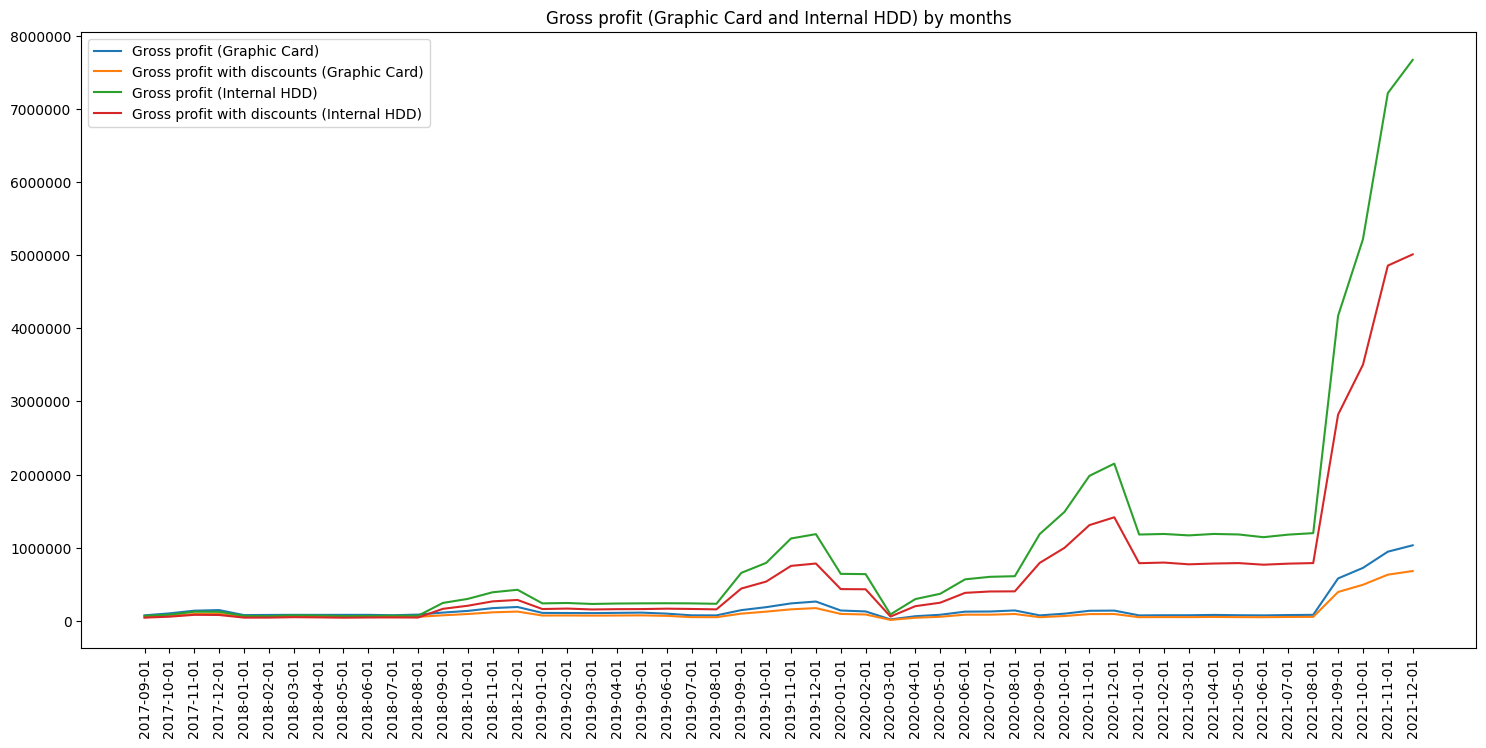

In [56]:
# creating plot 'Gross profit (Graphic Card and Internal HDD) by months'
plt.figure(figsize = (18, 8))
plt.plot(revenue_graphic_card['date'], revenue_graphic_card['SUM(profit_total)'], label = 'Gross profit (Graphic Card)')
plt.plot(revenue_graphic_card['date'], revenue_graphic_card['SUM(profit_total_with_discounts)'], label = 'Gross profit with discounts (Graphic Card)')
plt.plot(revenue_internal_hdd['date'], revenue_internal_hdd['SUM(profit_total)'], label = 'Gross profit (Internal HDD)')
plt.plot(revenue_internal_hdd['date'], revenue_internal_hdd['SUM(profit_total_with_discounts)'], label = 'Gross profit with discounts (Internal HDD)')
plt.title('Gross profit (Graphic Card and Internal HDD) by months')
plt.xticks(rotation = 90)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset = False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.legend();

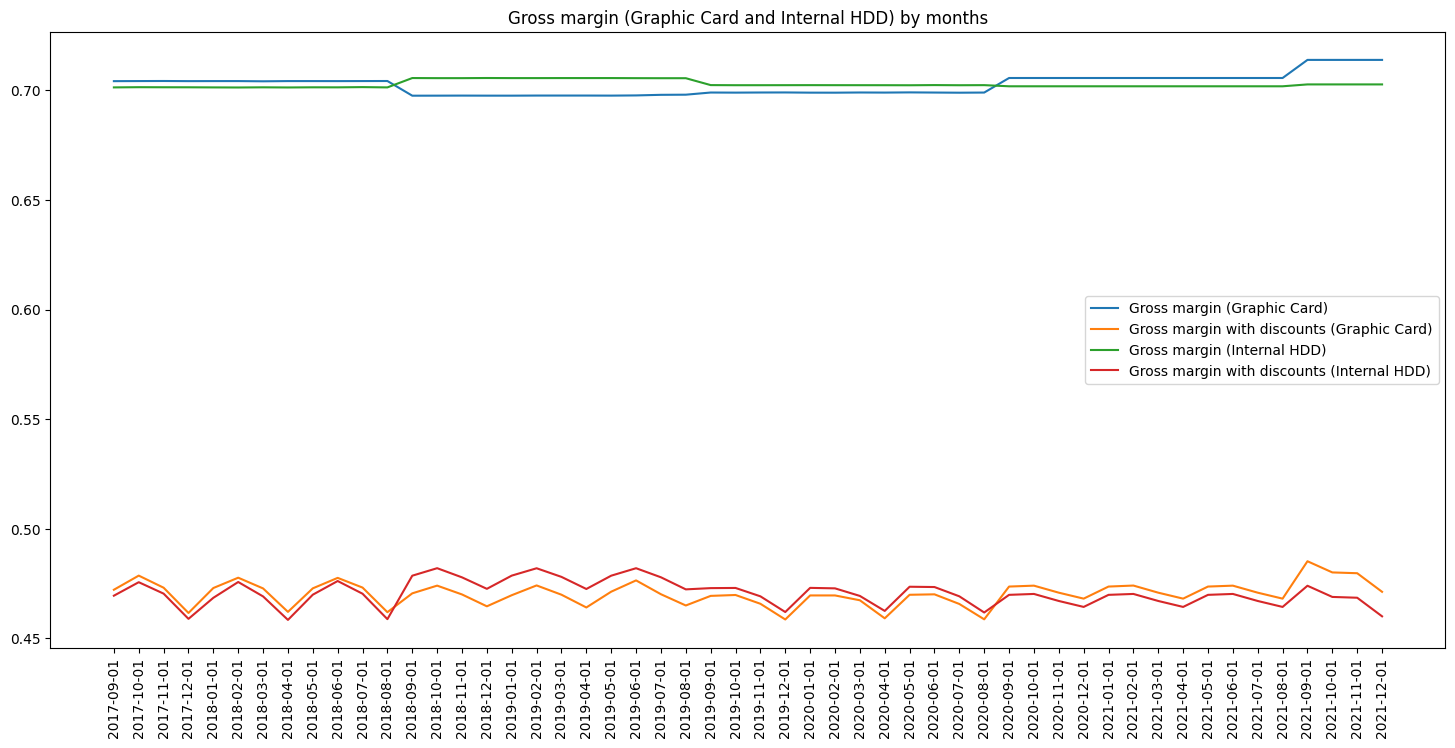

In [57]:
# creating plot 'Gross margin (Graphic Card and Internal HDD) by months'
plt.figure(figsize = (18, 8))
plt.plot(revenue_graphic_card['date'], revenue_graphic_card['AVG(margin)'], label = 'Gross margin (Graphic Card)')
plt.plot(revenue_graphic_card['date'], revenue_graphic_card['AVG(margin_with_discounts)'], label = 'Gross margin with discounts (Graphic Card)')
plt.plot(revenue_internal_hdd['date'], revenue_internal_hdd['AVG(margin)'], label = 'Gross margin (Internal HDD)')
plt.plot(revenue_internal_hdd['date'], revenue_internal_hdd['AVG(margin_with_discounts)'], label = 'Gross margin with discounts (Internal HDD)')
plt.title('Gross margin (Graphic Card and Internal HDD) by months')
plt.xticks(rotation = 90)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset = False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.legend();

_Before 2018-09-01 gross revenue and gross profit in Graphic Card and Internal HDD categories were practically the same._<br>
_After 2018-09-01 gross revenue and gross profit in Graphic Card category are much higher._

In [58]:
# creating df revenue_market grouped by date, market and region
query = """
    SELECT 
        date,
        market,
        region,
        SUM(revenue),
        SUM(profit_total),
        SUM(profit_total_with_discounts),
        AVG(margin),
        AVG(margin_with_discounts),
        COUNT(*)
    FROM 
        revenue_df_10
    GROUP BY
        date,
        market,
        region
    """
revenue_market = pd.read_sql_query(query, con)
display(revenue_market)

,date,market,region,SUM(revenue),SUM(profit_total),SUM(profit_total_with_discounts),AVG(margin),AVG(margin_with_discounts),COUNT(*)
0,2017-09-01,Australia,APAC,9103.13,6402.54,4458.81,0.70,0.49,40
1,2017-09-01,Brazil,LATAM,1219.80,858.39,516.48,0.70,0.42,8
2,2017-09-01,Canada,NA,4101.30,2884.91,1907.86,0.70,0.47,64
3,2017-09-01,China,APAC,1677.30,1179.02,707.43,0.70,0.42,16
4,2017-09-01,France,EU,9583.82,6738.67,4593.03,0.70,0.47,64
...,...,...,...,...,...,...,...,...,...
1124,2021-12-01,South Korea,APAC,1169436.42,823934.89,517816.21,0.70,0.48,36
1125,2021-12-01,Spain,EU,244266.59,172188.96,104609.41,0.70,0.43,72
1126,2021-12-01,Sweden,EU,31493.79,22138.26,14505.39,0.70,0.46,36
1127,2021-12-01,USA,NA,1876428.58,1322030.94,907907.85,0.70,0.48,99


In [59]:
# creating df revenue_APAC grouped by date
query = """
    SELECT 
        date,
        market,
        region,
        SUM(revenue),
        SUM(profit_total),
        SUM(profit_total_with_discounts),
        AVG(margin),
        AVG(margin_with_discounts),
        COUNT(*)
    FROM 
        revenue_df_10
    WHERE
        region = 'APAC'
    GROUP BY
        date
    """
revenue_APAC = pd.read_sql_query(query, con)

In [60]:
# creating df revenue_EU grouped by date
query = """
    SELECT 
        date,
        market,
        region,
        SUM(revenue),
        SUM(profit_total),
        SUM(profit_total_with_discounts),
        AVG(margin),
        AVG(margin_with_discounts),
        COUNT(*)
    FROM 
        revenue_df_10
    WHERE
        region = 'EU'
    GROUP BY
        date
    """
revenue_EU = pd.read_sql_query(query, con)

In [61]:
# creating df revenue_NA grouped by date
query = """
    SELECT 
        date,
        market,
        region,
        SUM(revenue),
        SUM(profit_total),
        SUM(profit_total_with_discounts),
        AVG(margin),
        AVG(margin_with_discounts),
        COUNT(*)
    FROM 
        revenue_df_10
    WHERE
        region = 'NA'
    GROUP BY
        date
    """
revenue_NA = pd.read_sql_query(query, con)

In [62]:
# creating df revenue_LATAM grouped by date
query = """
    SELECT 
        date,
        market,
        region,
        SUM(revenue),
        SUM(profit_total),
        SUM(profit_total_with_discounts),
        AVG(margin),
        AVG(margin_with_discounts),
        COUNT(*)
    FROM 
        revenue_df_10
    WHERE
        region = 'LATAM'
    GROUP BY
        date
    """
revenue_LATAM = pd.read_sql_query(query, con)

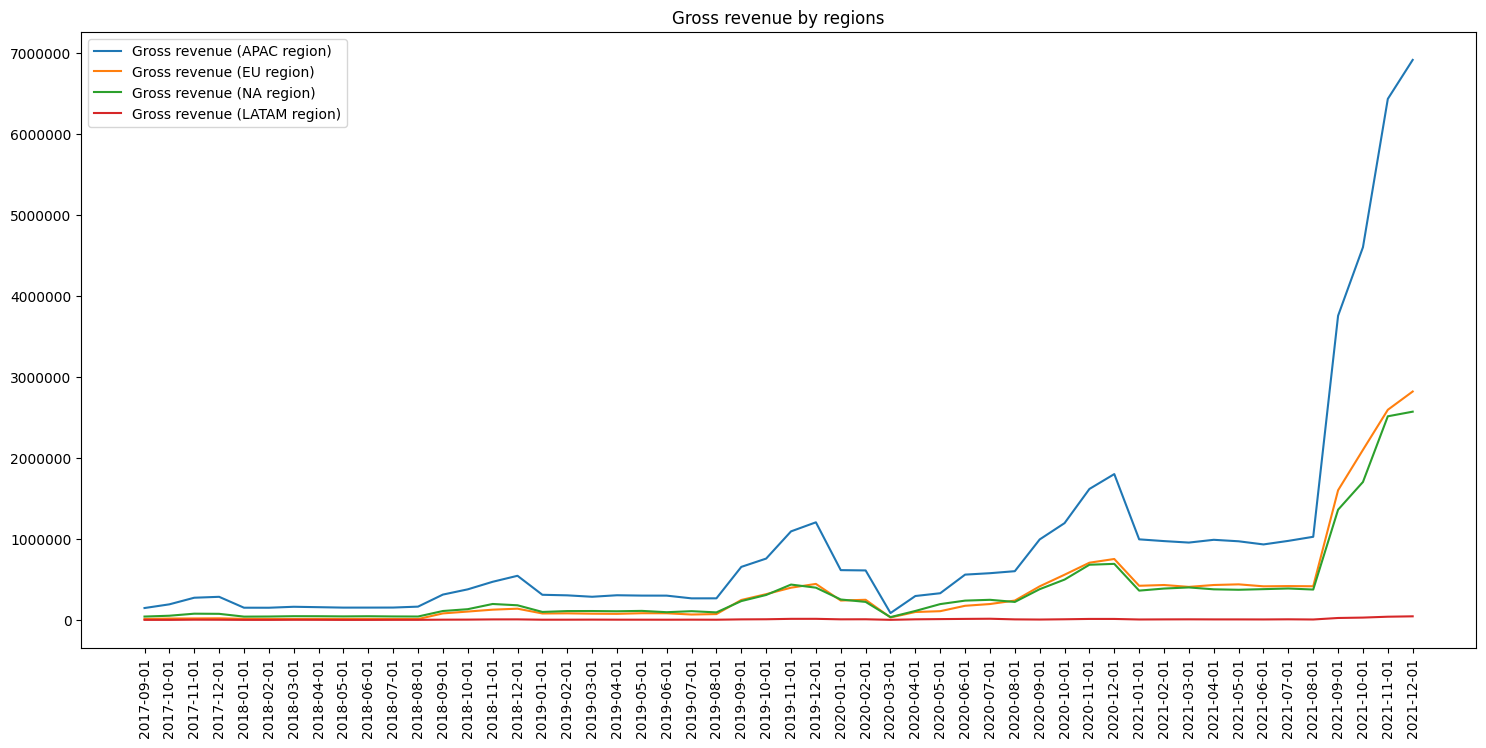

In [63]:
# creating plot Gross revenue by regions
plt.figure(figsize = (18, 8))
plt.plot(revenue_APAC['date'], revenue_APAC['SUM(revenue)'], label = 'Gross revenue (APAC region)')
plt.plot(revenue_EU['date'], revenue_EU['SUM(revenue)'], label = 'Gross revenue (EU region)')
plt.plot(revenue_NA['date'], revenue_NA['SUM(revenue)'], label = 'Gross revenue (NA region)')
plt.plot(revenue_LATAM['date'], revenue_LATAM['SUM(revenue)'], label = 'Gross revenue (LATAM region)')
plt.title('Gross revenue by regions')
plt.xticks(rotation = 90)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset = False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.legend();

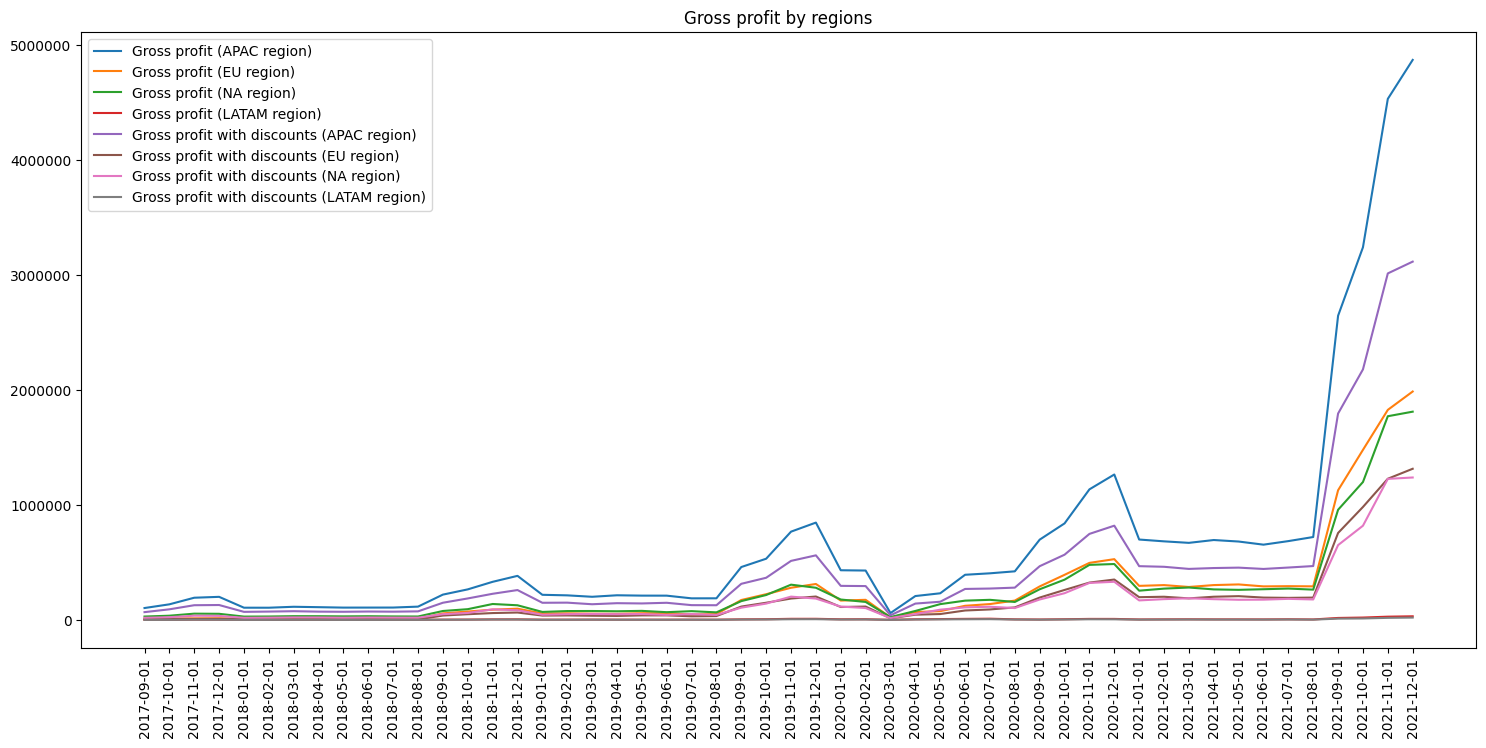

In [64]:
# creating plot Gross profit by regions
plt.figure(figsize = (18, 8))
plt.plot(revenue_APAC['date'], revenue_APAC['SUM(profit_total)'], label = 'Gross profit (APAC region)')
plt.plot(revenue_EU['date'], revenue_EU['SUM(profit_total)'], label = 'Gross profit (EU region)')
plt.plot(revenue_NA['date'], revenue_NA['SUM(profit_total)'], label = 'Gross profit (NA region)')
plt.plot(revenue_LATAM['date'], revenue_LATAM['SUM(profit_total)'], label = 'Gross profit (LATAM region)')
plt.plot(revenue_APAC['date'], revenue_APAC['SUM(profit_total_with_discounts)'], label = 'Gross profit with discounts (APAC region)')
plt.plot(revenue_EU['date'], revenue_EU['SUM(profit_total_with_discounts)'], label = 'Gross profit with discounts (EU region)')
plt.plot(revenue_NA['date'], revenue_NA['SUM(profit_total_with_discounts)'], label = 'Gross profit with discounts (NA region)')
plt.plot(revenue_LATAM['date'], revenue_LATAM['SUM(profit_total_with_discounts)'], label = 'Gross profit with discounts (LATAM region)')
plt.title('Gross profit by regions')
plt.xticks(rotation = 90)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset = False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.legend();

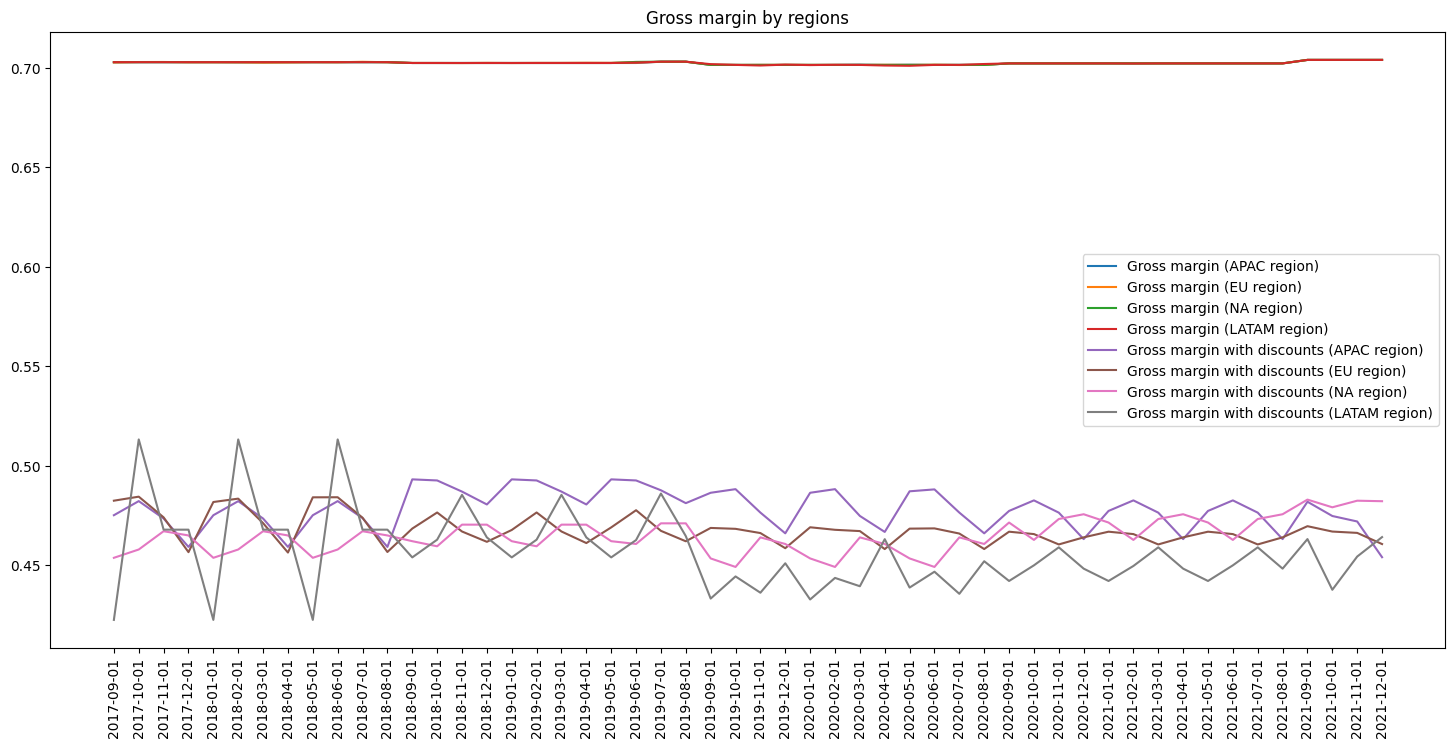

In [65]:
# creating plot Gross margin by regions
plt.figure(figsize = (18, 8))
plt.plot(revenue_APAC['date'], revenue_APAC['AVG(margin)'], label = 'Gross margin (APAC region)')
plt.plot(revenue_EU['date'], revenue_EU['AVG(margin)'], label = 'Gross margin (EU region)')
plt.plot(revenue_NA['date'], revenue_NA['AVG(margin)'], label = 'Gross margin (NA region)')
plt.plot(revenue_LATAM['date'], revenue_LATAM['AVG(margin)'], label = 'Gross margin (LATAM region)')
plt.plot(revenue_APAC['date'], revenue_APAC['AVG(margin_with_discounts)'], label = 'Gross margin with discounts (APAC region)')
plt.plot(revenue_EU['date'], revenue_EU['AVG(margin_with_discounts)'], label = 'Gross margin with discounts (EU region)')
plt.plot(revenue_NA['date'], revenue_NA['AVG(margin_with_discounts)'], label = 'Gross margin with discounts (NA region)')
plt.plot(revenue_LATAM['date'], revenue_LATAM['AVG(margin_with_discounts)'], label = 'Gross margin with discounts (LATAM region)')
plt.title('Gross margin by regions')
plt.xticks(rotation = 90)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset = False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.legend();

In [66]:
# setting ['date'] column as datetime
revenue_APAC['date'] = pd.to_datetime(revenue_APAC['date'])
revenue_EU['date'] = pd.to_datetime(revenue_EU['date'])
revenue_NA['date'] = pd.to_datetime(revenue_NA['date'])
revenue_LATAM['date'] = pd.to_datetime(revenue_LATAM['date'])

In [67]:
# setting ['date'] column as index
revenue_APAC.set_index('date', inplace = True)
revenue_EU.set_index('date', inplace = True)
revenue_NA.set_index('date', inplace = True)
revenue_LATAM.set_index('date', inplace = True)

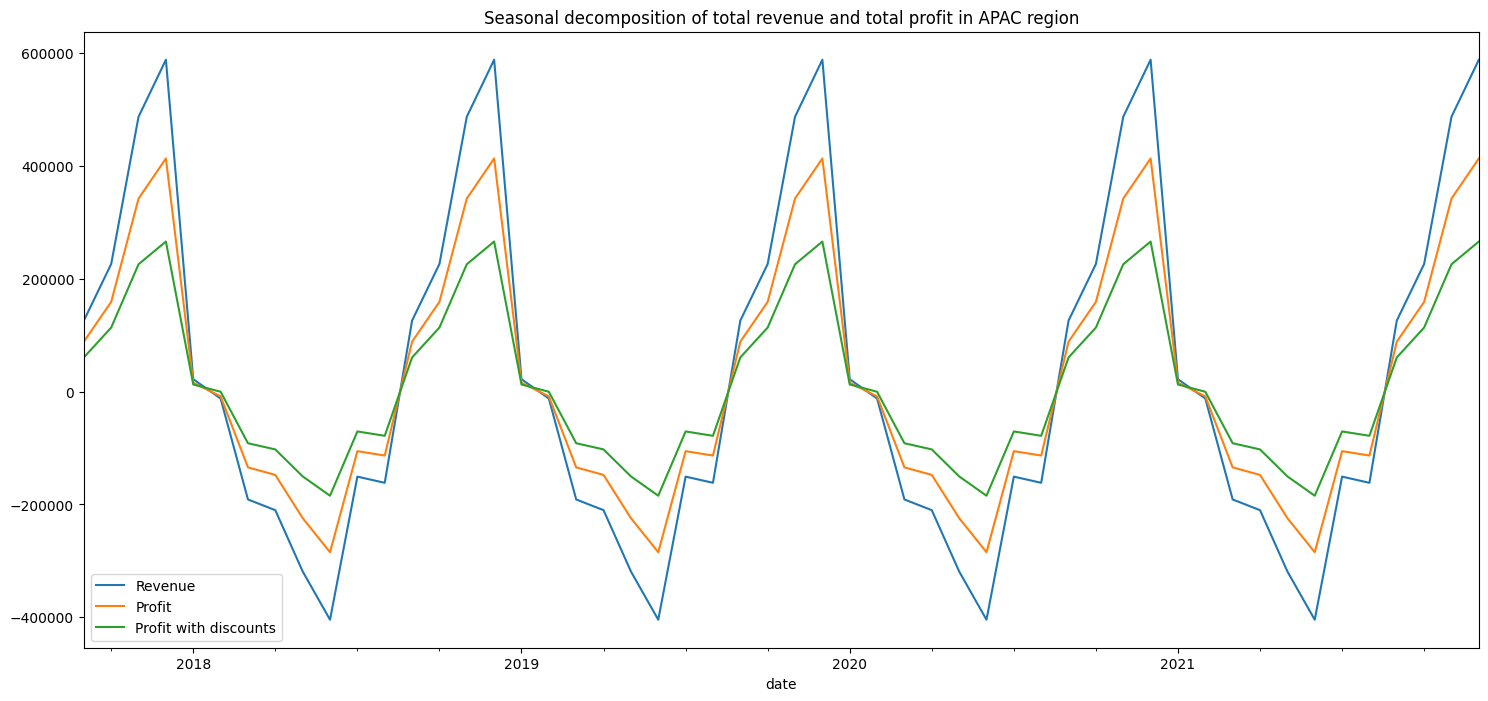

In [68]:
# creating seasonal decomposition of total revenue and total profit (with and without discounts) in APAC region
plt.figure(figsize = (18, 8))
seasonal_decompose(revenue_APAC['SUM(revenue)']).seasonal.plot(label = 'Revenue') 
seasonal_decompose(revenue_APAC['SUM(profit_total)']).seasonal.plot(label = 'Profit')
seasonal_decompose(revenue_APAC['SUM(profit_total_with_discounts)']).seasonal.plot(label = 'Profit with discounts')
plt.title('Seasonal decomposition of total revenue and total profit in APAC region')
plt.legend();

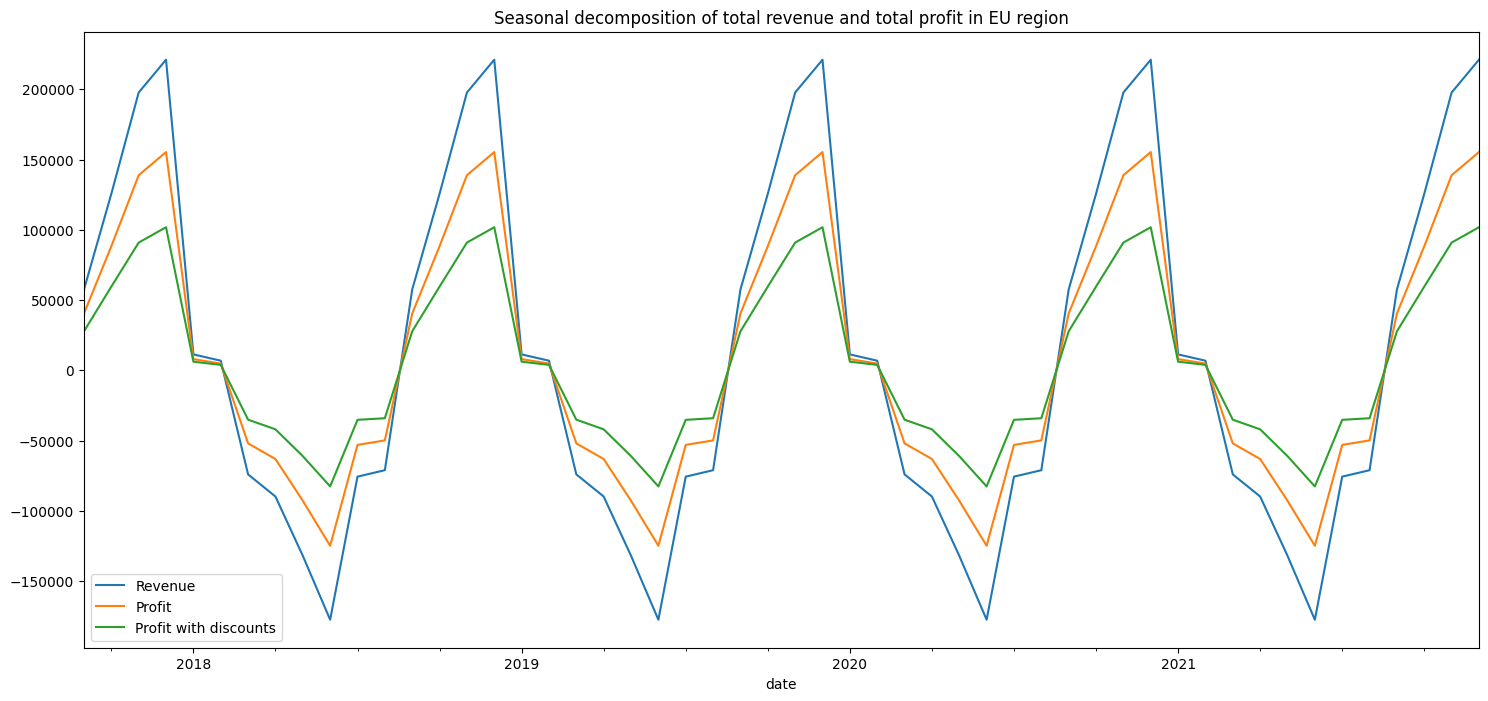

In [69]:
# creating seasonal decomposition of total revenue and total profit (with and without discounts) in EU region
plt.figure(figsize = (18, 8))
seasonal_decompose(revenue_EU['SUM(revenue)']).seasonal.plot(label = 'Revenue') 
seasonal_decompose(revenue_EU['SUM(profit_total)']).seasonal.plot(label = 'Profit')
seasonal_decompose(revenue_EU['SUM(profit_total_with_discounts)']).seasonal.plot(label = 'Profit with discounts')
plt.title('Seasonal decomposition of total revenue and total profit in EU region')
plt.legend();

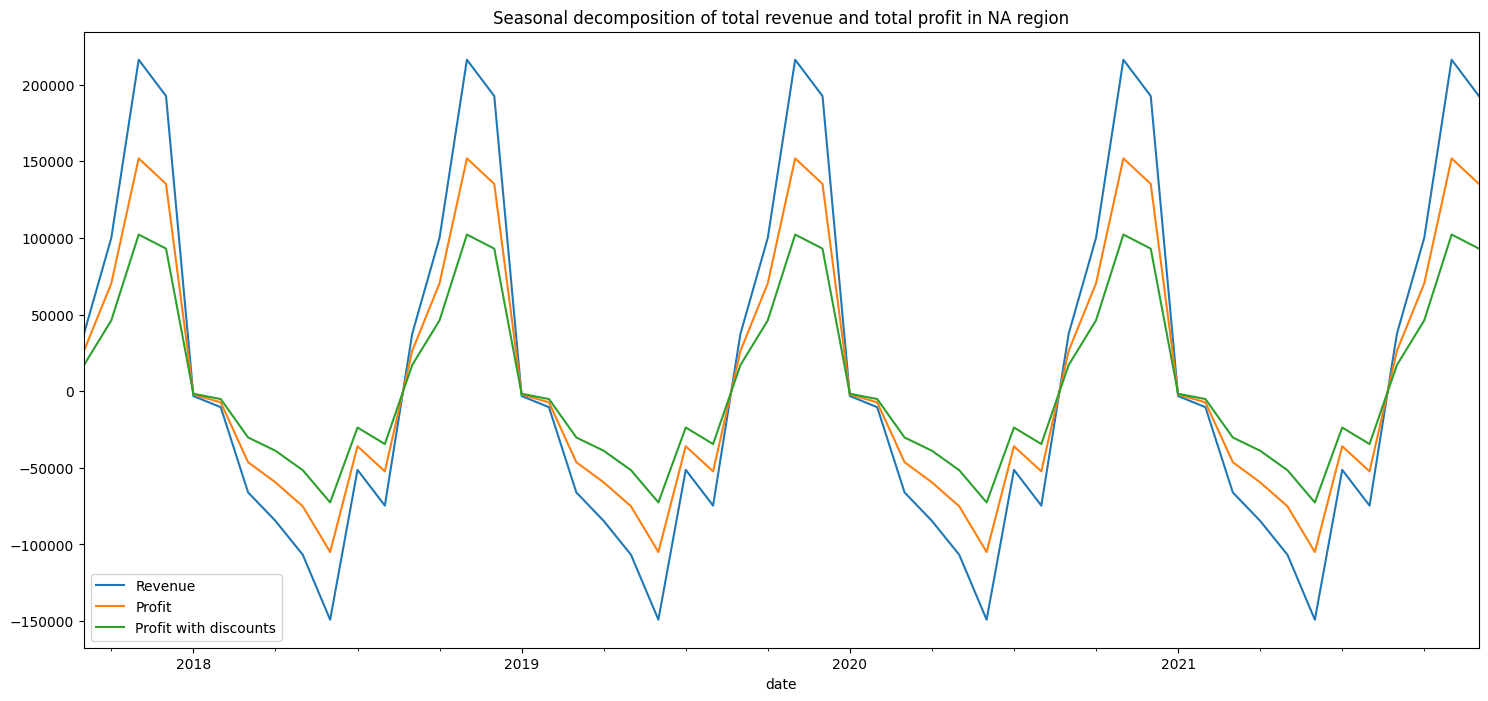

In [70]:
# creating seasonal decomposition of total revenue and total profit (with and without discounts) in NA region
plt.figure(figsize = (18, 8))
seasonal_decompose(revenue_NA['SUM(revenue)']).seasonal.plot(label = 'Revenue') 
seasonal_decompose(revenue_NA['SUM(profit_total)']).seasonal.plot(label = 'Profit')
seasonal_decompose(revenue_NA['SUM(profit_total_with_discounts)']).seasonal.plot(label = 'Profit with discounts')
plt.title('Seasonal decomposition of total revenue and total profit in NA region')
plt.legend();

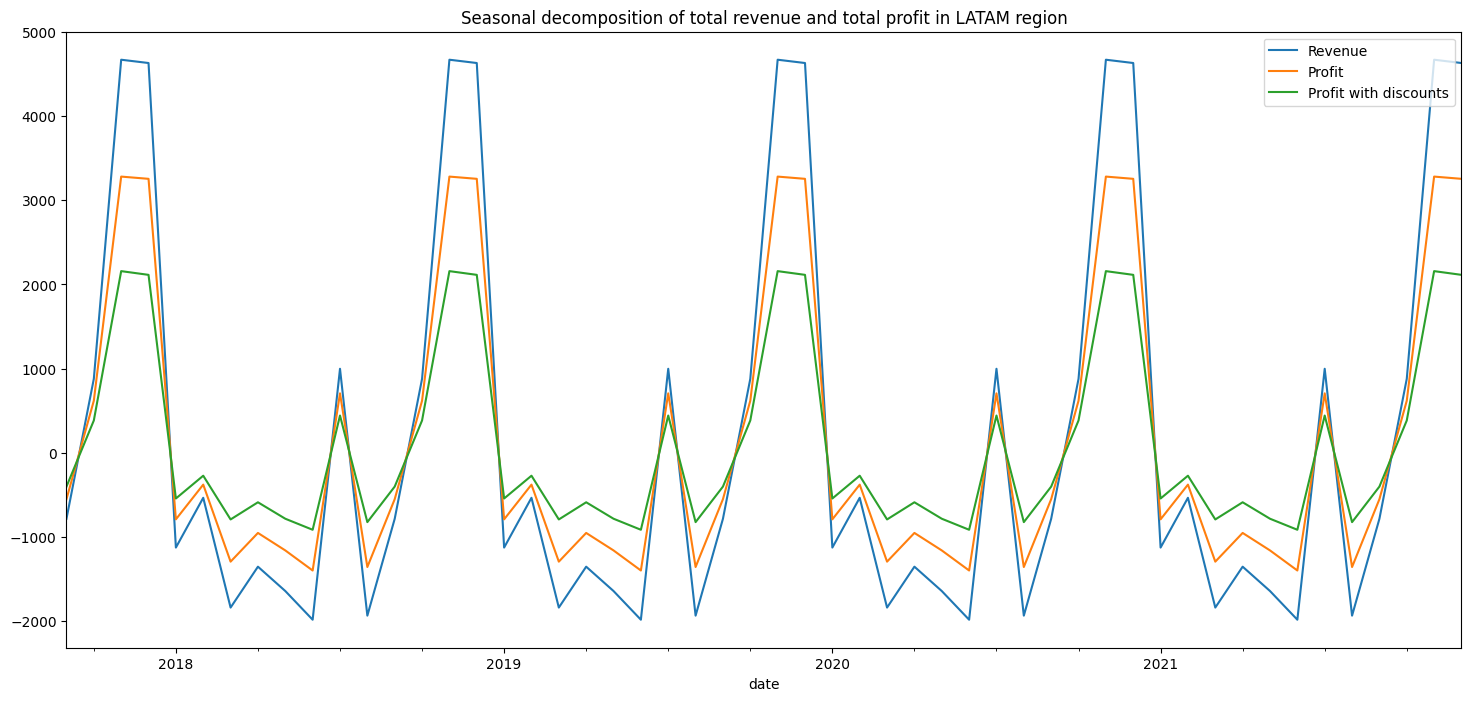

In [71]:
# creating seasonal decomposition of total revenue and total profit (with and without discounts) in LATAM region
plt.figure(figsize = (18, 8))
seasonal_decompose(revenue_LATAM['SUM(revenue)']).seasonal.plot(label = 'Revenue') 
seasonal_decompose(revenue_LATAM['SUM(profit_total)']).seasonal.plot(label = 'Profit')
seasonal_decompose(revenue_LATAM['SUM(profit_total_with_discounts)']).seasonal.plot(label = 'Profit with discounts')
plt.title('Seasonal decomposition of total revenue and total profit in LATAM region')
plt.legend();

_There is a dependency between the revenue, profit and a season._

In [72]:
# checking if disributions of Graphic Card and Internal HDD revenue and profit are normal
print(shapiro(revenue_graphic_card['SUM(revenue)']))
print(shapiro(revenue_graphic_card['SUM(profit_total)']))
print(shapiro(revenue_graphic_card['SUM(profit_total_with_discounts)']))
print(shapiro(revenue_internal_hdd['SUM(revenue)']))
print(shapiro(revenue_internal_hdd['SUM(profit_total)']))
print(shapiro(revenue_internal_hdd['SUM(profit_total_with_discounts)']))

ShapiroResult(statistic=0.48776936531066895, pvalue=3.268927229599372e-12)
ShapiroResult(statistic=0.4831724166870117, pvalue=2.8589658852135047e-12)
ShapiroResult(statistic=0.4834972620010376, pvalue=2.8860735416108563e-12)
ShapiroResult(statistic=0.5710978507995605, pvalue=4.352250157491078e-11)
ShapiroResult(statistic=0.5707550644874573, pvalue=4.303195993982101e-11)
ShapiroResult(statistic=0.5705536007881165, pvalue=4.274634812784228e-11)


_Distributions are not normal (pvalues are below 0.5). We should use Mann–Whitney U tests._

In [73]:
# checking if there are differences between Graphic Card and Internal HDD revenue and profit.
print(mannwhitneyu(revenue_graphic_card['SUM(revenue)'], revenue_internal_hdd['SUM(revenue)']))
print(mannwhitneyu(revenue_graphic_card['SUM(profit_total)'], revenue_internal_hdd['SUM(profit_total)']))
print(mannwhitneyu(revenue_graphic_card['SUM(profit_total_with_discounts)'], revenue_internal_hdd['SUM(profit_total_with_discounts)']))

MannwhitneyuResult(statistic=637.0, pvalue=3.399153754521674e-06)
MannwhitneyuResult(statistic=633.0, pvalue=2.9958730952313365e-06)
MannwhitneyuResult(statistic=631.0, pvalue=2.8118594714771855e-06)


_Pvalues are below 0.5. There are differences between Graphic Card and Internal HDD revenue and profit._

## 3. Conclusions
- Gross revenue and gross profit at the end of the years is higher.
- Gross revenue and gross profit after 2021-08-01 is increasing fast.
- Gross margin is between 0.7014 and 0.7040. 
- Gross margin with discounts is between 0.46 and 0.48. Gross margin with discounts is higher in february, june and october. It is lower in april, august and december.
- No products sold from divisions N & S and PC. The only products sold are from division P & A.
- No products sold from segments Accessories, Notebook, Desktop, Storage, Networking. The only products sold are from segment Peripherals.
- The only products sold are from categories Internal HDD and Graphic Card.
- Before 2018-09-01 gross revenue and gross profit in Graphic Card and Internal HDD categories were practically the same. After 2018-09-01 gross revenue and gross profit in Graphic Card category are much higher.
- There are no unprofitable divisions, segments or categories of the products.
- There is a dependency between the revenue, profit and a season.
- There are differences between Graphic Card and Internal HDD revenue and profit.